In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
# import dataset

df = pd.read_csv('../data-cleaning/dataset/combineddata.csv')

In [3]:
df.head()


,powder,salt,oil,edible,vegetable,wheat,flour,sugar,chilli,red,...,tocopheryl,triethanolamine,cl,titanium,dioxide,root,stearate,orange,honey,TYPE
0,1,1,1,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('TYPE', axis=1), df['TYPE'], test_size=0.33, random_state=42)

In [5]:
# Random Forest

rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, random_state=0)

In [6]:
y_predicted = rf.predict(X_test)

In [7]:
accuracy_score(y_test, y_predicted)

0.8709677419354839

In [8]:
y_predicted_train = rf.predict(X_train)
accuracy_score(y_train, y_predicted_train)

0.88

In [9]:
cm = confusion_matrix(y_test, y_predicted)

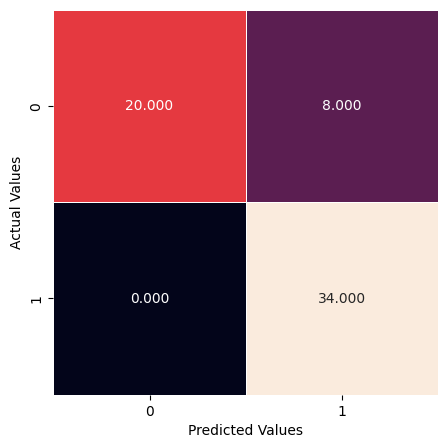

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='0.3f', linewidth=0.5, square=True, cbar=False)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


In [11]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        28
           1       0.81      1.00      0.89        34

    accuracy                           0.87        62
   macro avg       0.90      0.86      0.86        62
weighted avg       0.90      0.87      0.87        62



In [12]:
# Cross Validation Score

from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=rf, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Accuracy: 86.99 %
Standard Deviation: 11.08 %


In [14]:
from sklearn.metrics import roc_curve, roc_auc_score
# PREDICTING PROBABILITY
y_pred_prob = rf.predict_proba(X_test)[:,1]
lr_auc = roc_auc_score(y_test, y_pred_prob)
lr_auc


0.9831932773109243

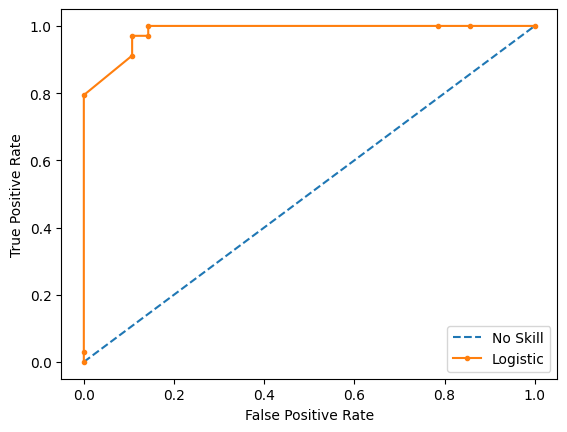

In [16]:
from matplotlib import pyplot
from numpy import sqrt, argmax, save
import numpy as np
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
np.save("fpr_DT", fpr)
np.save("tpr_DT", tpr)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

SVM: f1=0.895 auc=0.987
0.5483870967741935


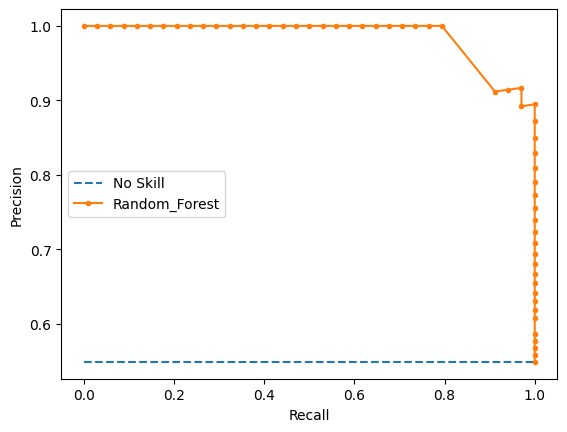

In [19]:
from sklearn.metrics import auc, precision_recall_curve, f1_score
from matplotlib import pyplot
lr_precision, lr_recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
np.save("lrp_DT", lr_precision)
np.save("lrr_DT", lr_recall)
lr_f1, lr_auc = f1_score(y_test, y_predicted), auc(lr_recall, lr_precision)
# summarize scores
print('SVM: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
fscore = (2 * lr_precision * lr_recall) / (lr_precision + lr_recall)
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
print(no_skill)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Random_Forest')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()